In [3]:
!pip install yfinance
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 473 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

Symbols = ["META"]

In [5]:
#time
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2022,11,1)

In [6]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol

for i in Symbols:  
   
    # print the symbol which is being downloaded
    #print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
   
    try:
        # download the stock price
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)      
        # append the individual stock prices
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None
stock

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200,META
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900,META
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100,META
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300,META
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800,META
...,...,...,...,...,...,...,...
2022-10-25,130.880005,138.350006,130.589996,137.509995,137.509995,38433200,META
2022-10-26,131.679993,135.550003,128.529999,129.820007,129.820007,82791500,META
2022-10-27,97.980003,102.500000,96.379997,97.940002,97.940002,232316600,META


In [7]:
stock_final = stock_final[["Open","High","Low","Close","Volume"]]
stock_final = stock_final.round(2)
stock_final["Date"] = stock_final.index
stock_final = stock_final.fillna(method="ffill")
stock_final

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2019-01-02,128.99,137.51,128.56,135.68,28146200,2019-01-02
2019-01-03,134.69,137.17,131.12,131.74,22717900,2019-01-03
2019-01-04,134.01,138.00,133.75,137.95,29002100,2019-01-04
2019-01-07,137.56,138.87,135.91,138.05,20089300,2019-01-07
2019-01-08,139.89,143.14,139.54,142.53,26263800,2019-01-08
...,...,...,...,...,...,...
2022-10-25,130.88,138.35,130.59,137.51,38433200,2022-10-25
2022-10-26,131.68,135.55,128.53,129.82,82791500,2022-10-26
2022-10-27,97.98,102.50,96.38,97.94,232316600,2022-10-27


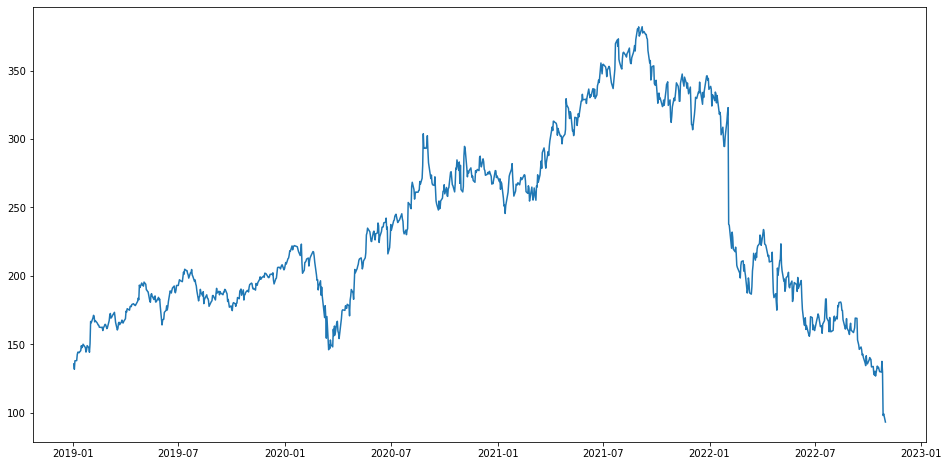

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))

plt.plot(stock_final['Close'], label='Close Price history')

In [9]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [10]:
data = stock_final.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(stock_final)),columns=['Date', 'Close'])

for i in range(0,len(data)):

    new_data['Date'][i] = data['Date'][i]

    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date

new_data.drop('Date', axis=1, inplace=True)
new_data

,Close
Date,
2019-01-02,135.68
2019-01-03,131.74
2019-01-04,137.95
2019-01-07,138.05
2019-01-08,142.53
...,...
2022-10-25,137.51
2022-10-26,129.82
2022-10-27,97.94


In [11]:
dataset = new_data.values

 

train = dataset[0:758,:]

test = dataset[758:,:]


scaler = MinMaxScaler(feature_range=(0, 1))

In [12]:
scaled_data = scaler.fit_transform(dataset)

 

x_train, y_train = [], []

for i in range(60,len(train)):

    x_train.append(scaled_data[i-60:i,0])

    y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

 

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))

model.add(LSTM(units=50))

model.add(Dense(1))

 

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

698/698 - 19s - loss: 0.0051 - 19s/epoch - 27ms/step


In [14]:
inputs = new_data[len(new_data) - len(test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs  = scaler.transform(inputs)

 

X_test = []

for i in range(60,inputs.shape[0]):

    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

 

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

closing_price = model.predict(X_test)

closing_price = scaler.inverse_transform(closing_price)

7/7 [==============================] - 1s 13ms/step


<ipython-input-15-61fe4b26dd55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = closing_price


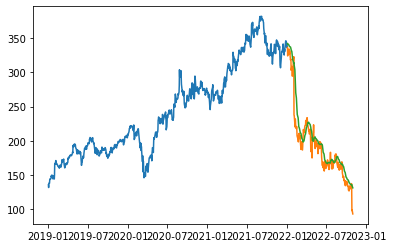

In [15]:
train = new_data[:758]

test = new_data[758:]

test['Predictions'] = closing_price

plt.plot(train['Close'])

plt.plot(test[['Close','Predictions']])

In [19]:
data = stock_final.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(stock_final)),columns=['Date', 'Close'])

for i in range(0,len(data)):

  new_data['Date'][i] = data['Date'][i]

  new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date

new_data.drop('Date', axis=1, inplace=True)

for i in pd.date_range('20221101', '20230630'):
  if i.weekday() <5:
    new_data.loc[i] = [0]

new_data

,Close
Date,
2019-01-02,135.68
2019-01-03,131.74
2019-01-04,137.95
2019-01-07,138.05
2019-01-08,142.53
...,...
2023-06-26,0
2023-06-27,0
2023-06-28,0


In [25]:
dataset = new_data.values

 

train = dataset[0:966,:]

test = dataset[966:,:]


scaler = MinMaxScaler(feature_range=(0, 1))

In [27]:
scaled_data = scaler.fit_transform(dataset)

 

x_train, y_train = [], []

for i in range(60,len(train)):

    x_train.append(scaled_data[i-60:i,0])

    y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

 

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [28]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))

model.add(LSTM(units=50))

model.add(Dense(1))

 

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

906/906 - 16s - loss: 0.0053 - 16s/epoch - 18ms/step


In [29]:
inputs = new_data[len(new_data) - len(test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs  = scaler.transform(inputs)

 

X_test = []

for i in range(60,inputs.shape[0]):

    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

 

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

closing_price = model.predict(X_test)

closing_price = scaler.inverse_transform(closing_price)

6/6 [==============================] - 1s 11ms/step


<ipython-input-31-83a31247201f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = closing_price


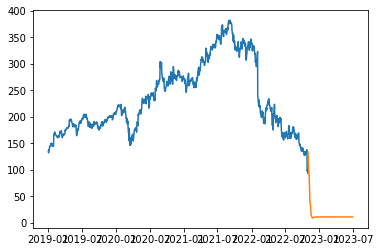

In [31]:
train = new_data[:966]

test = new_data[966:]

test['Predictions'] = closing_price

plt.plot(train['Close'])

plt.plot(test[['Predictions']])